**Importing libraries**

In [2]:
import seaborn as sns
import pandas as pd
import numpy as np

In [3]:
import pandas as pd
df=pd.read_csv('/content/drive/MyDrive/Datas/WA_Fn-UseC_-HR-Employee-Attrition.csv')
#copying the variable so that we can modify the data in copied version
df_copy=df.copy()

In [ ]:
#Information dekhauxa
print(df_copy.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [12]:

#Null values haru dekhauxa
#df_copy.isnull().sum()

# Print the count of each category in the 'MentalHealth' column to verify
print(df_copy["MentalHealth"].value_counts())

MentalHealth
Average     755
Stable      358
Unstable    357
Name: count, dtype: int64


In [ ]:
#Showing columns
print(df.columns)

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')


In [ ]:
df_copy.isnull().sum()

,0
Age,0
Attrition,0
BusinessTravel,0
DailyRate,0
Department,0
DistanceFromHome,0
Education,0
EducationField,0
EmployeeCount,0
EmployeeNumber,0


<Axes: ylabel='Age'>

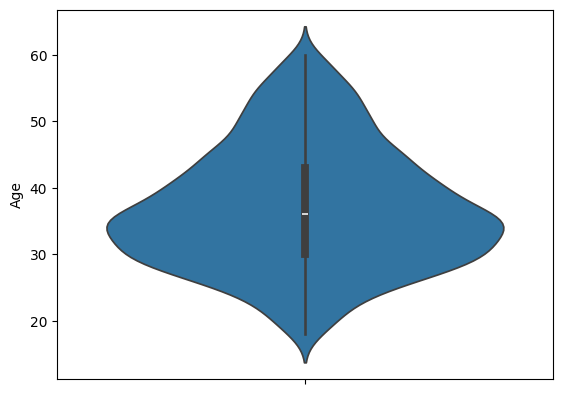

In [ ]:
import seaborn as sns

sns.violinplot(df_copy["Age"])

<Axes: ylabel='StockOptionLevel'>

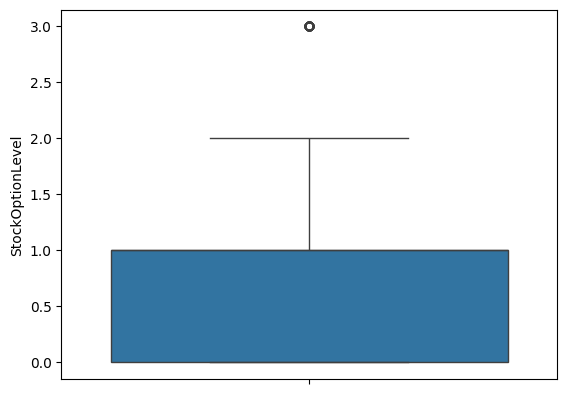

In [23]:
#df_copy["StockOptionLevel"].value_counts()
sns.boxplot(df_copy["StockOptionLevel"])


#Detection of outlier

In [ ]:
for i in df_copy.select_dtypes(include=['int64', 'float64']).columns:
    q1 = df_copy[i].quantile(0.25)
    q3 = df_copy[i].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - iqr * 1.5
    upper_bound = q3 + iqr * 1.5

    outliers = df_copy[(df_copy[i] < lower_bound) | (df_copy[i] > upper_bound)]
    if not outliers.empty:
        print(f"Outliers found in column '{i}': ")

    # else:
    #     print(f"No outliers found in column '{i}'.")

Outliers found in column 'MonthlyIncome': 
Outliers found in column 'NumCompaniesWorked': 
Outliers found in column 'PerformanceRating': 
Outliers found in column 'StockOptionLevel': 
Outliers found in column 'TotalWorkingYears': 
Outliers found in column 'TrainingTimesLastYear': 
Outliers found in column 'YearsAtCompany': 
Outliers found in column 'YearsInCurrentRole': 
Outliers found in column 'YearsSinceLastPromotion': 
Outliers found in column 'YearsWithCurrManager': 


**Converting attrition column to categories**

In [ ]:

df_copy["Attrition"]=df_copy["Attrition"].map({"Yes":1,"No":0,1:1, 0:0})
#.map le numeric ma convert gardinxa Like 1 for Yes and 0 for No
#Last ko 0:0 ra 1:1 chai error na aaos vanna lai matrai hoo
print(df_copy["Attrition"])

0       1
1       0
2       1
3       0
4       0
       ..
1465    0
1466    0
1467    0
1468    0
1469    0
Name: Attrition, Length: 1470, dtype: int64


In [ ]:
print(df_copy['BusinessTravel'].head())

0        Travel_Rarely
1    Travel_Frequently
2        Travel_Rarely
3    Travel_Frequently
4        Travel_Rarely
Name: BusinessTravel, dtype: object


In [ ]:
df_copy['BusinessTravel']=df_copy["BusinessTravel"].map({"Travel_Rarely":1,"Travel_Frequently":2,"Non-Travel":0,0:0,1:1,2:2})
#.map le Tyo specific values ma number haru halxa like Travel_Rarely" ma 1...
#0:0,2:2 rakhda Error aaudaina
print(df_copy['BusinessTravel'].head())

0    1
1    2
2    1
3    2
4    1
Name: BusinessTravel, dtype: int64


In [ ]:
df_copy["OverTime"].head()

,OverTime
0,Yes
1,No
2,Yes
3,Yes
4,No


In [ ]:
df_copy["OverTime"]=df_copy['OverTime'].map({"Yes":1,"No":0,0:0,1:1})
df_copy["OverTime"].head()

,OverTime
0,1
1,0
2,1
3,1
4,0


In [ ]:
df_copy["MaritalStatus"].head()

,MaritalStatus
0,Single
1,Married
2,Single
3,Married
4,Married


In [1]:
M="Married"
S="Single"
D="Divorced"
df_copy["MaritalStatus"]=df_copy["MaritalStatus"].map({S:0,M:1,D:-1, -1:-1,1:1,0:0})
print(df_copy["MaritalStatus"].head())

NameError: name 'df_copy' is not defined

In [ ]:
df_copy["Over18"]=df_copy["Over18"].map({"Y":1,"N":0,0:0,1:1})
print(df_copy["Over18"].head())

0    1
1    1
2    1
3    1
4    1
Name: Over18, dtype: int64


pd.cut() function to group and label them

In [ ]:
df_copy["DistanceFromHome"].head()


,DistanceFromHome
0,1
1,8
2,2
3,3
4,2


In [ ]:
df_copy["RangeTOffice"]=pd.cut(df["DistanceFromHome"],bins=[0,10,20,29],labels=["Near","Average","Far"])
print(df_copy["RangeTOffice"].tail())


1465     Far
1466    Near
1467    Near
1468    Near
1469    Near
Name: RangeTOffice, dtype: category
Categories (3, object): ['Near' < 'Average' < 'Far']


In [ ]:
print(df_copy["Age"].head())
df_copy["age_group"]=pd.cut(df["Age"],bins=[14,20,25,45,60],labels=["Entry_level","Mid_level","Senior_level","Experienced"])
#bins le group banauxa, like 15-20...etc, ani labels le Tyo group ko person lai grouping garxa, like 15-19 are Entry level
print(df_copy["age_group"].head())


0    41
1    49
2    37
3    33
4    27
Name: Age, dtype: int64
0    Senior_level
1     Experienced
2    Senior_level
3    Senior_level
4    Senior_level
Name: age_group, dtype: category
Categories (4, object): ['Entry_level' < 'Mid_level' < 'Senior_level' < 'Experienced']


<Axes: ylabel='MonthlyIncome'>

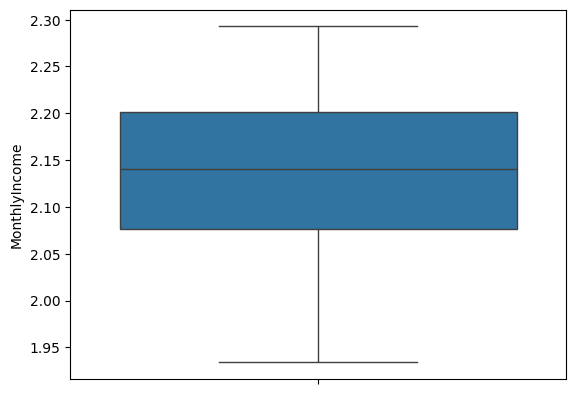

In [ ]:
df_copy["MonthlyIncome"]=np.log(df_copy["MonthlyIncome"])
df_copy["MonthlyIncome"].head()
sns.boxplot(df_copy["MonthlyIncome"])

In [ ]:
print(df_copy["StockOptionLevel"].unique())
df_copy["PerformanceRating"]=df_copy["PerformanceRating"].mean()
print(df_copy["PerformanceRating"])
sns.boxplot(df["PerformanceByRating"])

In [ ]:
df_copy["YearsAtCompany"]=np.log(df_copy["YearsAtCompany"])
df_copy["MonthlyIncome"].head()
sns.boxplot(df_copy["MonthlyIncome"])

In [ ]:
df_copy = handle_outliers_capping(df_copy, 'YearsInCurrentRole')

# You can optionally check for outliers again after capping to see the effect
for i in ['YearsInCurrentRole']: # Check only the modified column
  q1 = df_copy[i].quantile(0.25)
  q3 = df_copy[i].quantile(0.75)
  iqr = q3 - q1
  lower_bound = q1 - iqr * 1.5
  upper_bound = q3 + iqr * 1.5

  outliers = df_copy[(df_copy[i] < lower_bound) | (df_copy[i] > upper_bound)]
  if not outliers.empty:
    print(f"Outliers found in column '{i}' after capping: ")
  else:
    print(f"No outliers found in column '{i}' after capping.")

# You can also visualize the distribution after handling outliers
sns.boxplot(df_copy['YearsInCurrentRole'])

In [19]:
#Seeing mental health status
df_copy["Temp"]=df["JobSatisfaction"]+df["WorkLifeBalance"]
# Fix: Apply the condition row by row to assign "Stable" or "Unstable"
df_copy["MentalHealth"] = pd.cut(df_copy["Temp"], bins=[0,4,6,8],labels=["Unstable","Average","Stable"])
print(df_copy["MentalHealth"])


0        Average
1        Average
2        Average
3        Average
4        Average
          ...   
1465      Stable
1466    Unstable
1467     Average
1468    Unstable
1469      Stable
Name: MentalHealth, Length: 1470, dtype: category
Categories (3, object): ['Unstable' < 'Average' < 'Stable']



Combined categorical feature 'Department_JobRole' created.
               Department                JobRole  \
0                   Sales        Sales Executive   
1  Research & Development     Research Scientist   
2  Research & Development  Laboratory Technician   
3  Research & Development     Research Scientist   
4  Research & Development  Laboratory Technician   

                                  Department_JobRole  
0  Person is inSales department and is doing Sale...  
1  Person is inResearch & Development department ...  
2  Person is inResearch & Development department ...  
3  Person is inResearch & Development department ...  
4  Person is inResearch & Development department ...  


In [ ]:

# 6. Feature based on work-life balance (creating a simple composite score)
# Normalize or scale if necessary before summing, but for simplicity, we'll just sum
# Note: This is a very basic example. A more sophisticated approach might involve different weights or interactions.
df_copy['WorkLifeBalance_Score'] = df_copy['RelationshipSatisfaction'] + df_copy['EnvironmentSatisfaction'] - df_copy['OverTime'] - df_copy['BusinessTravel'] # Assuming higher values for satisfaction are good, and higher values for overtime/travel are bad after mapping
print("\nWork-life balance score feature created.")
print(df_copy[['RelationshipSatisfaction', 'EnvironmentSatisfaction', 'OverTime', 'BusinessTravel', 'WorkLifeBalance_Score']].head())
